In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

In [ ]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [ ]:
X.shape

(4, 1)

In [ ]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [ ]:
y.shape

(4,)

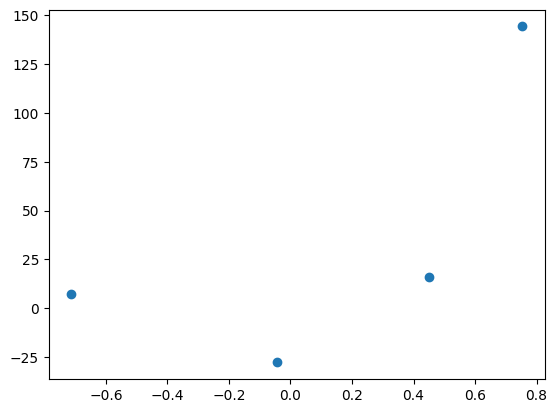

In [ ]:
plt.scatter(X,y)

### Apply OLS

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [ ]:
reg.predict(X)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [ ]:
b = reg.intercept_
b

26.15963284313262

In [ ]:
m = reg.coef_
m

array([78.35063668])

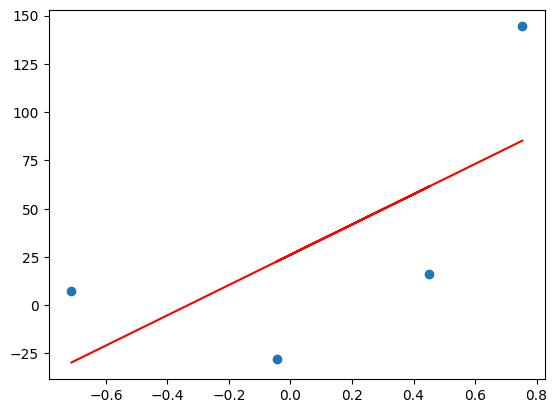

In [ ]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

### Gradient Descent

In [ ]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0

y_pred = ((78.35 * X) + 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

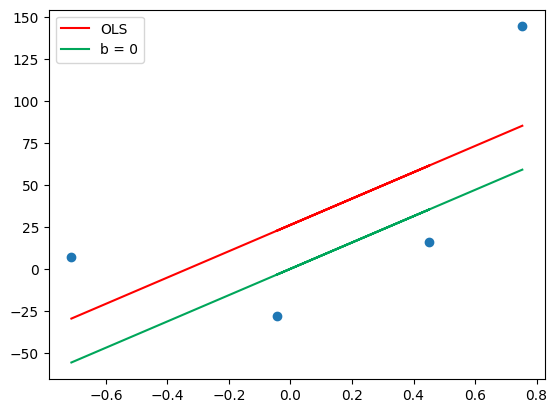

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 1
# Calculate slope at b = 0 in Loss Function vs b curve

m = 78.35
b = 0

loss_slope = -2 * np.sum(y- (m * X.ravel()) - b)
loss_slope

-209.27763408209216

In [ ]:
X.ravel()

array([-0.71239066,  0.45181234, -0.04450308,  0.75376638])

In [ ]:
# Lets take learning rate = 0.1

lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [ ]:
# Calculating the new intercept

b1 = b - step_size
b1

20.927763408209216

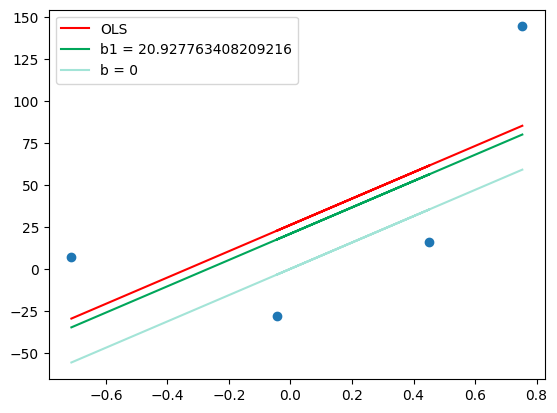

In [ ]:
y_pred1 = ((78.35 * X) + b1).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 2
# Calculate slope at b1 = 20.927763408209216 in Loss Function vs b curve

loss_slope = -2 * np.sum(y- (m * X.ravel()) - b1)
loss_slope

-41.85552681641843

In [ ]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [ ]:
# Calculating the new intercept

b2 = b1 - step_size
b2

25.11331608985106

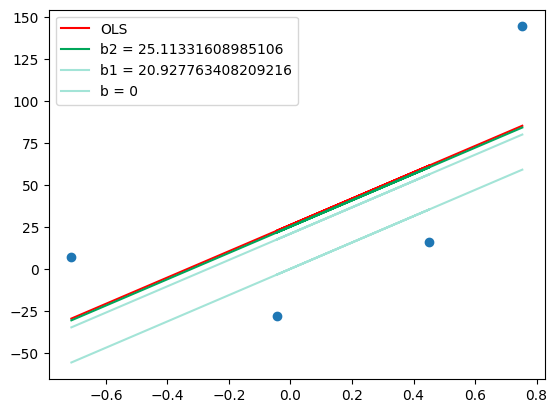

In [ ]:
y_pred2 = ((78.35 * X) + b2).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 3
# Calculate slope at b2 = 25.11331608985106 in Loss Function vs b curve

loss_slope = -2 * np.sum(y- (m * X.ravel()) - b2)
loss_slope

-8.371105363283675

In [ ]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [ ]:
# Calculating the new intercept

b3 = b2 - step_size
b3

25.95042662617943

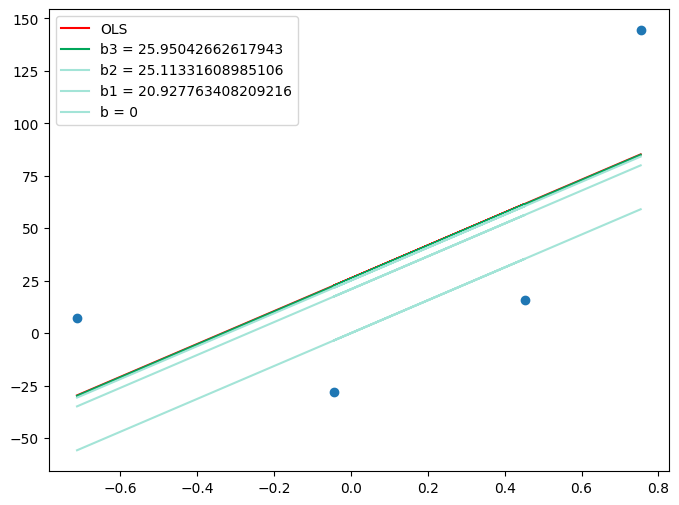

In [ ]:
y_pred3 = ((78.35 * X) + b3).reshape(4)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b3 = {}'.format(b3))
plt.plot(X,y_pred2,color='#A3E4D7',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [ ]:
# Iteration 4
# Calculate slope at b3 = 25.95042662617943 in Loss Function vs b curve

loss_slope = -2 * np.sum(y- (m * X.ravel()) - b3)
loss_slope

-1.674221072656735

In [ ]:
step_size = loss_slope*lr
step_size

-0.16742210726567353

In [ ]:
# Calculating the new intercept

b4 = b3 - step_size
b4

26.1178487334451

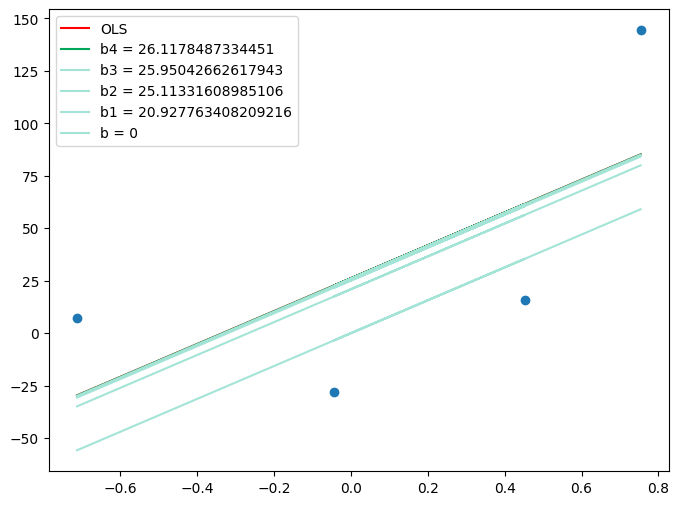

In [ ]:
y_pred4 = ((78.35 * X) + b4).reshape(4)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred4,color='#00a65a',label='b4 = {}'.format(b4))
plt.plot(X,y_pred3,color='#A3E4D7',label='b3 = {}'.format(b3))
plt.plot(X,y_pred2,color='#A3E4D7',label='b2 = {}'.format(b2))
plt.plot(X,y_pred1,color='#A3E4D7',label='b1 = {}'.format(b1))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

##### Doing above things using a loop

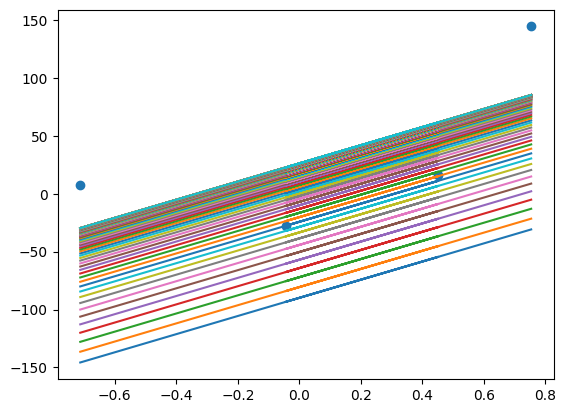

In [ ]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)
plt.show()